# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [179]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [180]:
# Your work here.
import numpy as np
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Is the distribution of body temperatures normal?
RESULT: Plotting the distribution of body temperature histogram, it looks like it is normal distribution. So Yes it is normal distribution.

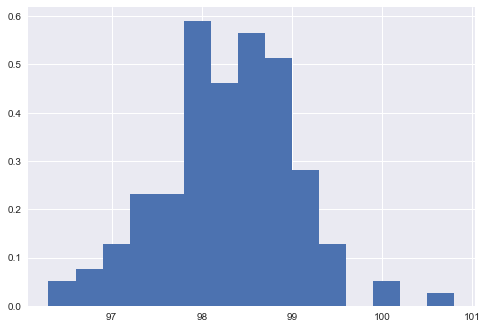

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['temperature'], normed = 'True', bins = 15)
plt.show()

# Is the sample size large? Are the observations independent?
RESULTS: Sample size of 130 which is considered to be large. Observations are independent because upon comparing the relationship between two different variables recorded for the same people it doesnt show any relation. 

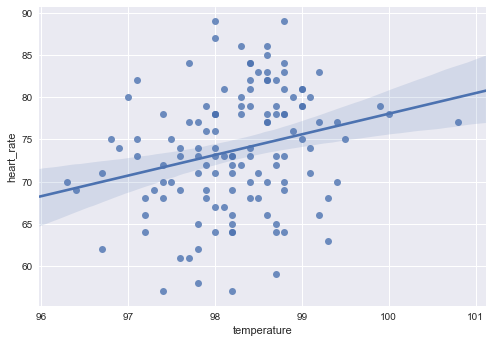


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         130
Number of Degrees of Freedom:   2

R-squared:         0.0643
Adj R-squared:     0.0570

Rmse:              6.8577

F-stat (1, 128):     8.8021, p-value:     0.0036

Degrees of Freedom: model 1, resid 128

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     2.4432     0.8235       2.97     0.0036     0.8291     4.0573
     intercept  -166.2847    80.9123      -2.06     0.0419  -324.8729    -7.6965
---------------------------------End of Summary---------------------------------



/Users/TarjaniAgrawal/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [199]:
# To test for independence of observations
#RESULTS: Observations are independent because the regression line is quite flat and also the R square value is much lower than 0.5
sns.regplot(x = 'temperature', y= 'heart_rate', data = df)
plt.show()
from pandas.stats.api import ols
res = ols(y = df['heart_rate'], x=df['temperature'])
print(res)

# Is the true population mean really 98.6 degrees F?

**Would you use a one-sample or two-sample test? Why?** 

Answer: We would use one sample test because we are looking at one population as a whole. 

**In this situation, is it appropriate to use the  t or  z statistic?**

Answer: We would use Z statistic because the sample size is 130 which is considered to be big sample size. T statistic is used for small sample size (n < 30)




**Step 1**: Calculate sample mean and sample Std dev 

**Step 2**: Pop std is not given hence, calculate the Best estimate of std dev of sampling distribution of sample mean 

In [200]:
sample_mean , sample_stddev  = df['temperature'].mean(), df['temperature'].std()
print(sample_mean, sample_stddev)
pop_mean = 98.6
sampledist_stddev= sample_stddev/ np.sqrt(130)
print(sampledist_stddev)

98.24923076923078 0.7331831580389454
0.0643044168379


**Step 3**: Calculate z estimate

In [201]:
z = (sample_mean - pop_mean)/sampledist_stddev
print(z)

-5.45482329236


**Step 4**: Find the probabality of finding the z estimate 

In [209]:
import scipy.stats as ss
p_value = ss.norm.cdf(z)*2
print(p_value)

4.90215701411e-08


**Result:** The probablity of finding the z estimate with true population mean is very low, way below 0.05, therefore
the true population mean can not be 98.6


**Now try using the other test. How is the result be different? Why?**

To do this calculate the t statistic and probability of findind the t statistic 

In [210]:
t = (sample_mean - pop_mean)/sampledist_stddev
p_value = ss.t.cdf(t, 129)*2
print(p_value)

2.41063204156e-07


**Result**: The probablity of finding the t estimate with true population mean is very low, way below 0.05, therefore the true population mean can not be 98.6

The results are same using both z statistic and t statistics because for the large sample size the t statistics approximates to z statistic.

# At what temperature should we consider someone's temperature to be "abnormal"?

RESULTS: 95% CI is 98.08 and 98.33, therefore any temperature above or below these values can be considered abnormal. 


In [222]:
#To Find the 95% confidence interval for two tail test and using approximation of CLT. 
x1 = ss.norm.ppf(0.975, loc=98.2, scale= 0.06)
x2 = ss.norm.ppf(0.025, loc=98.2, scale= 0.06)
marginoferror1 = 2 * sampledist_stddev     #because 2 std approx equal to 95% CI
print(x1 , x2)
print(marginoferror1)

98.3175978391 98.0824021609
0.128608833676


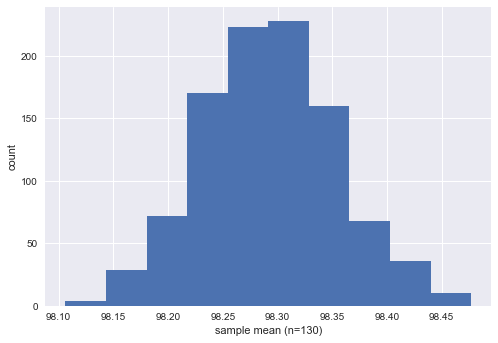

[ 98.17763338  98.42387876] 0.122837156509


In [229]:
#To Find the 95% confidence interval for two tail test and using smilations by resmapling the sample 
#finding the sampling distribution of the sample means. 

import numpy as np
temp = ss.norm.rvs(loc=98.2, scale=.74, size=130, random_state=None)

def resample(temp):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = np.random.choice(temp, 130, replace=True)
        return new_sample
        def sample_stat(new_sample):
            return new_sample.mean()
def compute_sample_statistics(temp, iters=1000):
    stats = [sample_stat(resample(temp)) for i in range(iters)]
    return np.array(stats)


sample_means = compute_sample_statistics(temp, iters=1000)


plt.hist(sample_means)
plt.xlabel('sample mean (n=130)')
plt.ylabel('count')
plt.show()
None

conf_int = np.percentile(sample_means, [2.5, 97.5])
marginoferror = 2 * sample_means.std()
print(conf_int, marginoferror)

# Is there a significant difference between males and females in normal temperature? 

See answer at the end.

**What test did you use and why?**

I use two sample significance test to compare the difference in mean for the two samples.

In [230]:
df = df.drop('heart_rate', 1)

In [231]:
#Getting data for male and females separately
df_gender = df.groupby(['gender'])
df_female = df_gender.get_group('F')
df_male = df_gender.get_group('M')
group1= df_female['temperature']
group2= df_male['temperature']

**Step 1:** Define test statistic to get difference of means and calculate the actual difference in means

In [233]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat
actual = TestStatistic((group1, group2))
actual

0.289230769230727

**Step 2:** Assume null hypothesis that there is no difference between the means and stimulate such a model but randomizing the data points. And the run the model 10000 times and plot to see the distribution of the difference in means

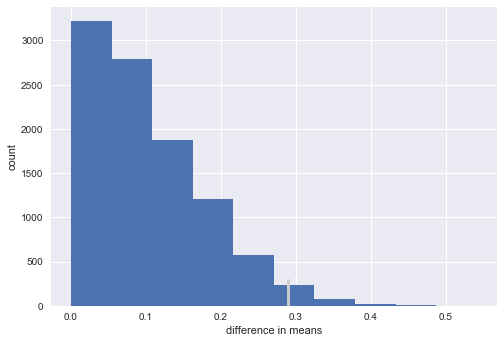

In [234]:
n, m = len(group1), len(group2)
pool = np.hstack((group1, group2))
def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

test_stats = np.array([TestStatistic(RunModel()) for i in range(10000)])
test_stats.shape
plt.vlines(actual, 0, 300, linewidth=3, color='0.8')
plt.hist(test_stats)
plt.xlabel('difference in means')
plt.ylabel('count')
plt.show()
None


**Step 3:** Calculate the probability of getting the diff in means as extreme as actual or more than actual. 

In [235]:
pvalue = sum(test_stats >= actual) / len(test_stats)
pvalue

0.0247

**RESULT:** Since the probability of getting the actual difference seen in data and even extreme to that is only 2.5%.

Which means that when we assume that there is no difference in means we have very low probablity of seening the difference that we are seeing here. 

Therefore, we can say that this event can not occur purely by chance and hence can reject the null hypothesis and 
consider the alternate hypothesis that there is significant difference in male and female body temperature. 

## Write a story with your conclusion in the context of the original problem

The mean normal body temperature is considered to be 98.6 F for more than 120 years. It was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. However, we want to check if this reported value is statistically correct. 

Do to this we looked at the distribution of body temperature for a sample of 130 people and found that the temperature is normally distributed and moreover the values are independent as they were taken from different people as well as the other parameter 'heart rate' did not influence the body temperature. So we considered that central limit theorem can be applied to the sample data to make inference about the population mean body temperature. 

Next, we tried to estimate the mean body temperature using the data and 95% confidence interval for the mean. To do this we stimulated the experiment for 10000 and calcuted the means and formed the sampling distribution of the sample means. Using this distribution we calculated the mean and found that mean was very different from the actual body temperature reported by the scientist. So we went on to see the probability of finding the z statistic considering the true population mean is indeed the actual mean. Upon doing this we found that the probablity of finding the z statistic is very low and therefore true population mean can not be equal to 98.6 F. 

To further confirm the results we tried to do the t statistic for the same and since the sample size was quite big the t statistic approximates to z statistic and hence gave same results. 

Finding the confidence intervals for body temperatures also gave us pretty good idea about normal body temperature range in the people.

We further explored the data to find out if the mean body temperature in men is different from that in women. We did the significance test for the problem and found that indeed the men and women body temperatures are significantly different from each other. 
